# Utilisation de la bibliothèque Scipy

In [39]:
import numpy as np
import scipy
from scipy import stats       # statistiques
from scipy import optimize    # optimisation
from scipy import integrate   # intégration et ODE
from scipy import interpolate # interpolation
from scipy import fft         # transformée de Fourier

print("Versions :")
print("NumPy :", np.__version__)
print("SciPy :", scipy.__version__)

Versions :
NumPy : 2.1.2
SciPy : 1.15.1


## Distributions continues et discrètes

In [40]:
from scipy.stats import norm, poisson

# Distribution normale (continue)
mu, sigma = 0, 1
x = np.linspace(-5,5,100)
pdf = norm.pdf(x, mu, sigma)   # densité de probabilité
cdf = norm.cdf(x, mu, sigma)   # fonction de répartition
r = norm.rvs(mu, sigma, size=10)  # tirages aléatoires

print("PDF de la normale :", pdf[:5])
print("CDF de la normale :", cdf[:5])
print("10 valeurs aléatoires normales :", r)

# Distribution de Poisson (discrète)
lam = 3
k = np.arange(0,10)
pmf = poisson.pmf(k, lam)
r_poisson = poisson.rvs(lam, size=10)

print("\nPMF de Poisson :", pmf)
print("10 valeurs aléatoires Poisson :", r_poisson)

PDF de la normale : [1.48671951e-06 2.45106104e-06 3.99989037e-06 6.46116639e-06
 1.03310066e-05]
CDF de la normale : [2.86651572e-07 4.81652980e-07 8.01369697e-07 1.32024804e-06
 2.15381086e-06]
10 valeurs aléatoires normales : [ 1.15256249 -0.0370619   0.23223329 -0.87694202  1.16065209  0.82974276
  1.15954105 -1.12467526 -1.29664745  0.49362415]

PMF de Poisson : [0.04978707 0.14936121 0.22404181 0.22404181 0.16803136 0.10081881
 0.05040941 0.02160403 0.00810151 0.0027005 ]
10 valeurs aléatoires Poisson : [2 4 2 5 2 2 3 3 4 4]


## Test statistique (t-test, chi2)

In [41]:
from scipy.stats import ttest_1samp, chi2_contingency

# t-test à un échantillon
data = [2.3, 1.9, 2.8, 3.2, 2.7]
t_stat, p_val = ttest_1samp(data, popmean=2.0)
print("t-test : t =", t_stat, ", p =", p_val)

# Test du chi2 sur un tableau de contingence
obs = np.array([[10, 20], [20, 40]])
chi2_stat, p_val_chi, dof, expected = chi2_contingency(obs)
print("Chi2 :", chi2_stat, ", p =", p_val_chi)

t-test : t = 2.609543369861914 , p = 0.05944850404871588
Chi2 : 0.0 , p = 1.0


## Fonctions utiles (PDF, CDF, quantiles, rvs)

In [42]:
from scipy.stats import norm

dist = norm(loc=0, scale=1)

# PDF et CDF
print("PDF à 0 :", dist.pdf(0))
print("CDF à 0 :", dist.cdf(0))

# Quantiles
print("Quantile 0.95 :", dist.ppf(0.95))

# Tirages aléatoires
samples = dist.rvs(size=5)
print("5 valeurs aléatoires :", samples)

PDF à 0 : 0.3989422804014327
CDF à 0 : 0.5
Quantile 0.95 : 1.6448536269514722
5 valeurs aléatoires : [ 0.55839352 -0.22480164 -0.18181545 -2.23651384 -0.40528007]


## Optimisation d’une fonction scalaire (minimize)

In [43]:
from scipy.optimize import minimize

# Fonction à minimiser : f(x) = (x-3)^2 + 2
def f(x):
    return (x-3)**2 + 2

# Minimisation sans contrainte
res = minimize(f, x0=0)  # point de départ x0=0
print("Minimum :", res.fun)
print("Position du minimum :", res.x)

Minimum : 2.000000000000001
Position du minimum : [3.00000003]


## Résolution d’équations (root, fsolve)

In [44]:
from scipy.optimize import root, fsolve

# Exemple : x^2 - 4 = 0
def g(x):
    return x**2 - 4

# Avec root
sol_root = root(g, x0=1)
print("Solution avec root :", sol_root.x)

# Avec fsolve
sol_fsolve = fsolve(g, x0=1)
print("Solution avec fsolve :", sol_fsolve)

Solution avec root : [2.]
Solution avec fsolve : [2.]


## Ajustement de données (curve_fit)

Paramètres ajustés (a,b) : [2.00571429 0.05238095]


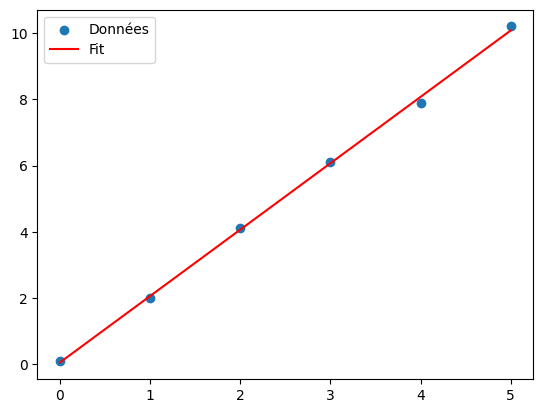

In [45]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Fonction modèle : linéaire
def f_model(x, a, b):
    return a*x + b

# Données simulées
xdata = np.array([0,1,2,3,4,5])
ydata = np.array([0.1,2.0,4.1,6.1,7.9,10.2])

# Ajustement
params, covariance = curve_fit(f_model, xdata, ydata)
print("Paramètres ajustés (a,b) :", params)

# Tracé
plt.scatter(xdata, ydata, label="Données")
plt.plot(xdata, f_model(xdata, *params), label="Fit", color="red")
plt.legend()
plt.show()

## Intégration simple (quad)

In [46]:
from scipy.integrate import quad

# Fonction à intégrer : f(x) = x^2
def f(x):
    return x**2

# Intégrale de 0 à 3
result, error = quad(f, 0, 3)
print("Intégrale de 0 à 3 :", result)
print("Erreur estimée :", error)

Intégrale de 0 à 3 : 9.000000000000002
Erreur estimée : 9.992007221626411e-14


## Intégration multiple (dblquad, tplquad)

In [47]:
from scipy.integrate import dblquad, tplquad

# Double intégrale de f(x,y) = x*y sur x=[0,1], y=[0,2]
def f_xy(x, y):
    return x*y

result, error = dblquad(f_xy, 0, 2, lambda y: 0, lambda y: 1)
print("Double intégrale :", result)

# Triple intégrale de f(x,y,z) = x+y+z sur [0,1]^3
def f_xyz(x, y, z):
    return x + y + z

result, error = tplquad(f_xyz, 0, 1, lambda x:0, lambda x:1, lambda x,y:0, lambda x,y:1)
print("Triple intégrale :", result)

Double intégrale : 0.9999999999999999
Triple intégrale : 1.5


## ODE (équations différentielles ordinaires)

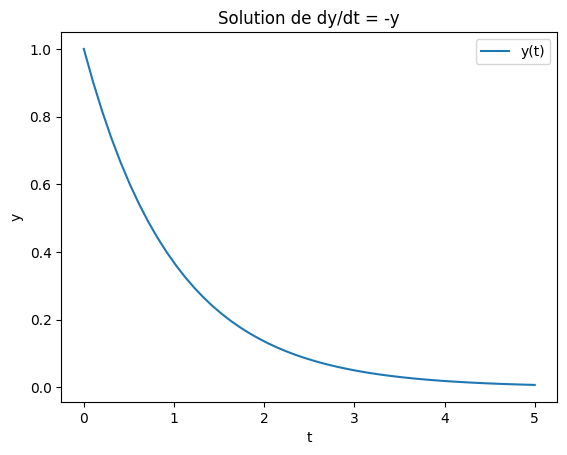

In [48]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# dy/dt = -y, y(0)=1
def f(t, y):
    return -y

t_span = (0, 5)
y0 = [1]

sol = solve_ivp(f, t_span, y0, t_eval=np.linspace(0,5,50))

plt.plot(sol.t, sol.y[0], label="y(t)")
plt.xlabel("t")
plt.ylabel("y")
plt.title("Solution de dy/dt = -y")
plt.legend()
plt.show()

## Interpolation 1D (interp1d)

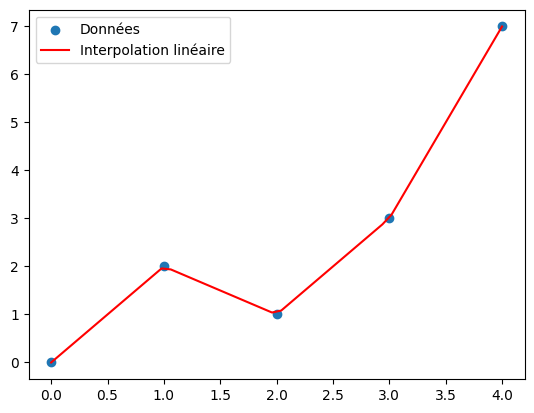

In [49]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Données simulées
x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 2, 1, 3, 7])

# Création de l'interpolateur linéaire
f_linear = interp1d(x, y, kind='linear')

# Interpolation sur un nouvel axe
xnew = np.linspace(0,4,50)
ynew = f_linear(xnew)

plt.scatter(x, y, label="Données")
plt.plot(xnew, ynew, label="Interpolation linéaire", color="red")
plt.legend()
plt.show()

## Interpolation 2D (griddata)

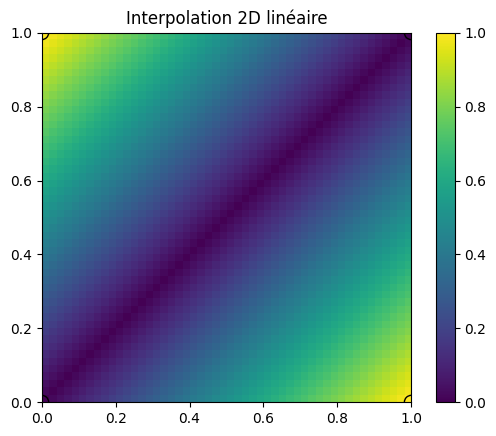

In [50]:
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# Points connus
points = np.array([[0,0],[0,1],[1,0],[1,1]])
values = np.array([0,1,1,0])

# Grille pour interpolation
grid_x, grid_y = np.mgrid[0:1:50j, 0:1:50j]

# Interpolation
grid_z = griddata(points, values, (grid_x, grid_y), method='linear')

plt.imshow(grid_z.T, extent=(0,1,0,1), origin='lower')
plt.scatter(points[:,0], points[:,1], c=values, edgecolor='k', s=100)
plt.title("Interpolation 2D linéaire")
plt.colorbar()
plt.show()

## FFT unidimensionnelle

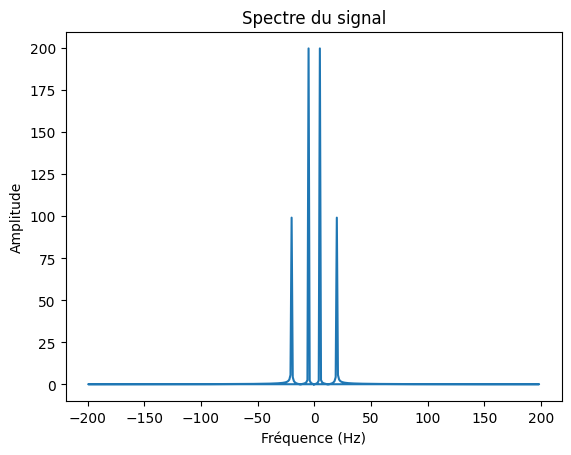

In [51]:
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

# Signal exemple : somme de deux sinusoïdes
t = np.linspace(0,1,400)
signal = np.sin(2*np.pi*5*t) + 0.5*np.sin(2*np.pi*20*t)

# FFT
fft_signal = fft(signal)
freq = np.fft.fftfreq(len(t), d=t[1]-t[0])

plt.plot(freq, np.abs(fft_signal))
plt.title("Spectre du signal")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.show()

## FFT bidimensionnelle

In [52]:
from scipy.fft import fft2, ifft2
import matplotlib.pyplot as plt

# Image 2D simple
image = np.array([[0,1,2],[3,4,5],[6,7,8]])

# FFT 2D
fft_image = fft2(image)

print("Image originale :\n", image)
print("FFT 2D :\n", fft_image)

Image originale :
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
FFT 2D :
 [[ 36. -0.j          -4.5+2.59807621j  -4.5-2.59807621j]
 [-13.5+7.79422863j   0. +0.j           0. -0.j        ]
 [-13.5-7.79422863j   0. +0.j           0. -0.j        ]]


## Spectre et fréquence

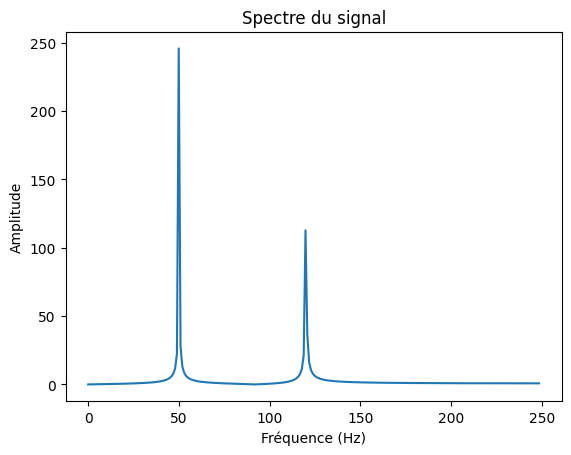

In [53]:
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

# Signal : sinusoïde
t = np.linspace(0,1,500)
signal = np.sin(2*np.pi*50*t) + 0.5*np.sin(2*np.pi*120*t)

# FFT
fft_signal = fft(signal)
freq = fftfreq(len(t), d=t[1]-t[0])

plt.plot(freq[:250], np.abs(fft_signal)[:250])  # moitié positive
plt.title("Spectre du signal")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.show()

## Optimisation avec contraintes

In [54]:
from scipy.optimize import minimize

# Fonction à minimiser : f(x,y) = (x-1)^2 + (y-2)^2
def f(vars):
    x, y = vars
    return (x-1)**2 + (y-2)**2

# Contrainte : x + y = 3
cons = {'type': 'eq', 'fun': lambda vars: vars[0] + vars[1] - 3}

# Bornes : 0 <= x <= 5, 0 <= y <= 5
bounds = [(0,5), (0,5)]

res = minimize(f, x0=[0,0], bounds=bounds, constraints=cons)
print("Minimum :", res.fun)
print("Position :", res.x)

Minimum : 3.95320690859762e-19
Position : [1. 2.]


## Statistiques multivariées

In [55]:
from scipy.stats import multivariate_normal

# Paramètres
mean = [0,0]
cov = [[1,0.5],[0.5,1]]

# Création d'une distribution
rv = multivariate_normal(mean, cov)

# PDF en un point
print("PDF à [0,0] :", rv.pdf([0,0]))

# Tirages aléatoires
samples = rv.rvs(size=5)
print("5 échantillons :", samples)

PDF à [0,0] : 0.1837762984739307
5 échantillons : [[ 1.80147964  1.39256611]
 [ 0.32762284 -1.42705496]
 [-0.01676778 -0.08840226]
 [-0.2986023   0.11922194]
 [ 0.22789607 -0.61847154]]


## Simulation / intégration sur des fonctions vectorisées

In [56]:
from scipy.integrate import quad

# Fonction vectorisée
f = lambda x: np.exp(-x**2)

# Intégration sur [0,1]
result, error = quad(f, 0, 1)
print("Intégrale de exp(-x^2) de 0 à 1 :", result)

Intégrale de exp(-x^2) de 0 à 1 : 0.7468241328124271


## Cheat Sheet SciPy

In [57]:
import numpy as np
from scipy import stats, optimize, integrate, interpolate, fft

# ==============================
# 1. Statistiques (scipy.stats)
# ==============================
from scipy.stats import norm, poisson, ttest_1samp, chi2_contingency, multivariate_normal

# Distribution continue et discrète
norm.pdf(0, loc=0, scale=1)
norm.cdf(1, loc=0, scale=1)
norm.ppf(0.95, loc=0, scale=1)
norm.rvs(size=5)

poisson.pmf(k=np.arange(0,10), mu=3)
poisson.rvs(mu=3, size=5)

# Test statistiques
ttest_1samp([2,3,4], popmean=3)
chi2_contingency(np.array([[10,20],[20,40]]))
multivariate_normal(mean=[0,0], cov=[[1,0.5],[0.5,1]])

# ==============================
# 2. Optimisation (scipy.optimize)
# ==============================
from scipy.optimize import minimize, root, fsolve, curve_fit

# Minimisation d'une fonction
res = minimize(lambda x: (x-3)**2, x0=0)
root(lambda x: x**2 -4, x0=1)
fsolve(lambda x: x**2-4, x0=1)
curve_fit(lambda x,a,b: a*x+b, xdata=np.array([0,1]), ydata=np.array([0,1]))

# Optimisation avec contraintes
cons = {'type':'eq', 'fun': lambda vars: vars[0]+vars[1]-3}
bounds = [(0,5),(0,5)]
min_res = minimize(lambda vars: (vars[0]-1)**2 + (vars[1]-2)**2, x0=[0,0], bounds=bounds, constraints=cons)

# ==============================
# 3. Intégration et ODE (scipy.integrate)
# ==============================
from scipy.integrate import quad, dblquad, tplquad, solve_ivp

quad(lambda x: x**2, 0, 3)
dblquad(lambda x,y: x*y, 0, 2, lambda y:0, lambda y:1)
tplquad(lambda x,y,z: x+y+z, 0,1, lambda x:0, lambda x:1, lambda x,y:0, lambda x,y:1)

# ODE
solve_ivp(lambda t,y: -y, t_span=(0,5), y0=[1], t_eval=np.linspace(0,5,50))

# ==============================
# 4. Interpolation (scipy.interpolate)
# ==============================
from scipy.interpolate import interp1d, griddata

interp1d([0,1,2],[0,1,4], kind='linear')
griddata(points=np.array([[0,0],[1,0]]), values=np.array([0,1]), xi=np.array([[0.5,0.5]]), method='nearest')


# ==============================
# 5. Transformée de Fourier (scipy.fft)
# ==============================
from scipy.fft import fft, ifft, fft2, fftfreq

fft(np.array([1,2,3,4]))
ifft(np.array([1,2,3,4]))
fft2(np.array([[1,2],[3,4]]))
fftfreq(4, d=0.1)

# ==============================
# 6. Simulation et tirages aléatoires
# ==============================
norm.rvs(size=5)
poisson.rvs(mu=3, size=5)
multivariate_normal(mean=[0,0], cov=[[1,0.5],[0.5,1]]).rvs(size=5)


C:\Users\amlat\AppData\Local\Temp\ipykernel_29968\23958056.py:32: OptimizeWarning: Covariance of the parameters could not be estimated
  curve_fit(lambda x,a,b: a*x+b, xdata=np.array([0,1]), ydata=np.array([0,1]))


array([[ 1.4628623 ,  1.35363285],
       [ 1.55855452,  2.80771424],
       [-0.93333509, -1.14561049],
       [ 0.72990772,  0.27490674],
       [ 0.16942418,  0.14038519]])